# The Environment
You will work on a custom version of the [Frozen Lake](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/) environment from OpenAI.

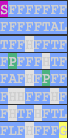

1. Your goal is to find a route from the top left corner to the bottom right corner.
2. Each position on the map is marked with a letter, and each letter has a different meaning:

  *   S - Initial (start) position. There's only one initial state on the map and it's always at the upper left corner.
  *   G - Final state. There's only one final state on the map and it's always in the lower right corner.
  *   H - Hole. When your agent reachs a hole, it falls into the water and cannot continue walking.
  *   P -  Portal. There are either two or zero portals on the map. When the agent reaches a portal, it is immediately transported to the other portal. You can assume that they will not appear in a final or initial state.
  *   F -  Frozen lake. This is the most common square on the map. The agent can walk on it safely.

  Your agent can move faster by collecting 3 special objects.

  *   T - [Talaria](https://en.wikipedia.org/wiki/Talaria). A pair of Winged Sandals that help you fly to the square.
  *   A - Air jorden. Jumping shoes that help you jump to the square.
  *   L - Lightning. Makes you run faster to the square.

  When the agent performs transition (s,a,s') and collects one of the objects (T,A,L) at state s', the collected object changes the cost of the transition (as detailed below). 

3. The cost of each transition (s,a,s') is based on the mark if the square s' you pass to:
  * S - 1
  * G - 1
  * H - 0
  * P - 100
  * F - 10
  * T - 3
  * A - 2
  * L - 1

4. The pink square marks where your agent is.

5. The number of states is equal to the number of squares on the map. The state index is calculated as follows: row_number *num_col + col_ number*. For example, the state index of the portal squere on row 3 is : 3 * 8 + 1 = 25.

6. Our agent can perform 4 actions:
  * 0 - Down
  * 1 - Right
  * 2 - Up
  * 3 - Left
  

7. If the agent tries to move outside the board boundaries, he stays in the same place.

8. Section 6 describes the order in which the nodes should be created.



In [67]:
import time
from IPython.display import clear_output
import numpy as np
from FrozenLakeEnv import FrozenLakeEnv
from typing import List, Tuple
import random

In [68]:
DOWN = 0
RIGHT = 1
UP = 2
LEFT = 3

# Maps
A map can be produced manually as shown in the cell below. We will only work on maps in which there is a route from the initial state to the final state.

In [69]:
MAPS = {
    "5x5": ["FFSFF",
            "FFFFF",
            "FFFFF",
            "FFFFF",
            "HFFFG"],
    "8x8": [
        "SFFFFFFF",
        "FFHFFHFL",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHTFHFFL",
        "FFFHFFFG",
    ],
}



# The Frozen Lake Environment ⛷
The file `FrozenLakeEnv.py` implements our own version of the frozen lake environment. It is recommended to go through the code. 

**Note: You are not allowed to change this file.**

Lets start by creating a new environment object.

In order to create an environment object, you must provide it with a board.

In [70]:
env = FrozenLakeEnv(MAPS["5x5"])
state = env.reset()
print(state)
print('Initial state:', state)

2
Initial state: 2


We've finished our demo 🥳 and it's time to reset the environment.

In [71]:
class RandomAgent():
  def __init__(self):
    self.env = None

  def animation(self, epochs: int ,state: int, action: List[int], total_cost: int) -> None:
      clear_output(wait=True)
      print(self.env.render())
      print(f"Timestep: {epochs}")
      print(f"State: {state}")
      print(f"Action: {action}")
      print(f"Total Cost: {total_cost}")
      time.sleep(1)

  def random_search(self, FrozenLakeEnv: env) -> Tuple[List[int],int]:
    self.env = env
    self.env.reset()
    epochs = 0
    cost = 0
    total_cost = 0

    actions = []

    state = self.env.get_initial_state()
    while not self.env.is_final_state(state):
      action = self.env.action_space.sample()
      new_state, cost, terminated = self.env.step(action)
        
      while terminated is True and self.env.is_final_state(state) is False:
        self.env.set_state(state)
        action = self.env.action_space.sample()
        new_state, cost, terminated = self.env.step(action)
        
      actions.append(action)
      total_cost += cost
      state = new_state
      epochs += 1
      
      self.animation(epochs,state,action,total_cost)

    return (actions, total_cost)


Let's check out this agent's performance!

The output of this agent is the sequence of actions that led to the solution and the route's cost. 

Our random agent is not very successful, so we'll print his actions as they happen. 

1.   **Stop his run in the middle if you are tired of looking at him.**
2.   After watching the agent please put the code in the box below in the a comment. During testing, we do not want the notebook to get stuck in this box.

 



**Did you remember to put the code above in a comment?!**

As you can see, a random policy is, unsurprisingly, not a good policy. However, what else can we do?

This is where you come in!

In this assignment you will be required to implement the following algorithms taught in class in order to solve the problem.

Algorithms: 
1. BFS-G
2. DFS-G
3. ID-DFS-G
4. Uniform Cost Search (UCS)
5. Greedy Best Search
6. W-A*
7. A* epsilon

Important to note!

Each agent should return a tuple: (actions, cost, expended) 
*  actions - the list of integers containing the sequence of actions that produce your agent's solution (and not the entire search process).
* cost -  an integer which holds the total cost of the solution.
* expanded - an integer which holds the number of nodes that have been expanded during the search.

The solution to our search problem is the path to the final state, not the final state itself (since it is known). By saving the actions, we are able to restore the path your agent found.


Any other output, unless otherwise specified, will cause the running of the notebook to fail and will result in a grade of 0 !




Some Tips:
1. Follow the pseudo-code shown in the lectures.
2. You should write all your code within the classes. This way, we prevent overlapping functions with the same name while running the notebook.
3. Consider implementing a "node" class.
4. Using small boards will help you debug.


The function below (`print_solution()`) can be used for debugging purposes. It prints the sequence of actions it receives. The function will not be used to test your code, so you are welcome to change it.

In [72]:
def print_solution(actions,env: FrozenLakeEnv) -> None:
    env.reset()
    total_cost = 0
    print(env.render())
    print(f"Timestep: {1}")
    print(f"State: {env.get_state()}")
    print(f"Action: {None}")
    print(f"Cost: {0}")
    time.sleep(1)

    for i, action in enumerate(actions):
      state, cost, terminated = env.step(action)
      total_cost += cost
      clear_output(wait=True)

      print(env.render())
      print(f"Timestep: {i + 2}")
      print(f"State: {state}")
      print(f"Action: {action}")
      print(f"Cost: {cost}")
      print(f"Total cost: {total_cost}")
      
      time.sleep(1)

      if terminated is True:
        break

In [73]:
# new_state, cost, terminated = env.step(UP)
# print(env.render())
# print("New state:", new_state)
# print("cost:", cost)
# print("Terminated:", terminated)


our_policy = list()
#for i in range(5):
#    our_policy.append(RIGHT)
for i in range(0,25):
    our_policy.append(DOWN)

# print_solution(our_policy, env)

In [76]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

X_AXIS_LOWER_BOUND = -10
X_AXIS_UPPER_BOUND = 10
X_AXIS_RESOLUTION = 100
HORIZON = X_AXIS_RESOLUTION

def categorical_td(policy, locations, initial_prob, step_size=0.1, num_epochs=500, discount_factor=1.0):
    return_prob = initial_prob
    for epoch in tqdm(range(num_epochs)):
        env.reset()
        curr_state = env.get_state()
        is_terminal = False
        while not is_terminal:
            action = policy[curr_state]
            next_state, reward, is_terminal = env.step(action)
            p_list = np.zeros(X_AXIS_RESOLUTION)
            for j in range(X_AXIS_RESOLUTION):
                if is_terminal:
                    g = reward
                else:
                    g = reward + discount_factor * locations[j]
                if g <= locations[0]:
                    p_list[0] += return_prob[next_state][j]
                elif g >= locations[X_AXIS_RESOLUTION - 1]:
                    p_list[X_AXIS_RESOLUTION - 1] += return_prob[next_state][j]
                else:
                    i_star = 0
                    while locations[i_star + 1] <= g:
                        i_star += 1
                    eta = (g - locations[i_star]) / (locations[i_star + 1] - locations[i_star])
                    #sif eta <=0:
                        #print(f'Eta = {eta}, g = {g}, location[i_star] = {locations[i_star]}, locations[i_star + 1] = {locations[i_star + 1]}')
                    p_list[i_star] += (1 - eta) * return_prob[next_state][j]
                    p_list[i_star + 1] += eta * return_prob[next_state][j]

            for i in range(X_AXIS_RESOLUTION):
                return_prob[curr_state][i] = (1 - step_size) * return_prob[curr_state][i] + step_size * p_list[i]
            curr_state = next_state
    return return_prob



100%|██████████| 500/500 [00:05<00:00, 95.02it/s]


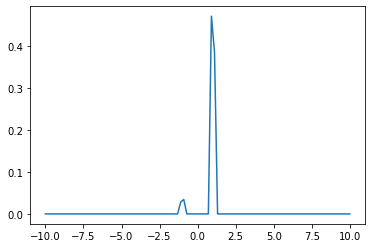

100%|██████████| 500/500 [00:05<00:00, 97.40it/s] 


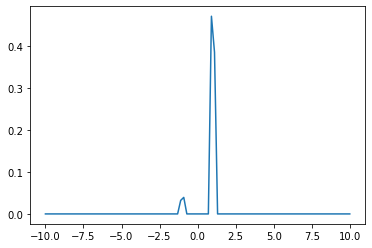

In [75]:
# Uniformly Distributed
init_prob = []
for i in range(len(our_policy)):
    init_prob.append([])
    for state in range(HORIZON):
        init_prob[i].append(1/HORIZON)

x_axis = np.linspace(X_AXIS_LOWER_BOUND, X_AXIS_UPPER_BOUND, X_AXIS_RESOLUTION)
td_prob = categorical_td(our_policy, x_axis, init_prob)
y_axis = np.array(init_prob)
plt.plot(x_axis, y_axis[2, :])
plt.show()